## Group member 3: outlier removal

### Subtask:
Identify numerical features where outliers might exist. Implement a strategy to detect and handle outliers (e.g., using the Interquartile Range (IQR) method, Z-scores, or visualization-based detection). Visualize the distributions of relevant features before and after outlier removal.


**Reasoning**:
Identify the numerical columns that are not binary and visualize their distributions using box plots to detect outliers.



Numerical columns for outlier detection:
['id', 'age', 'avg_glucose_level', 'bmi']


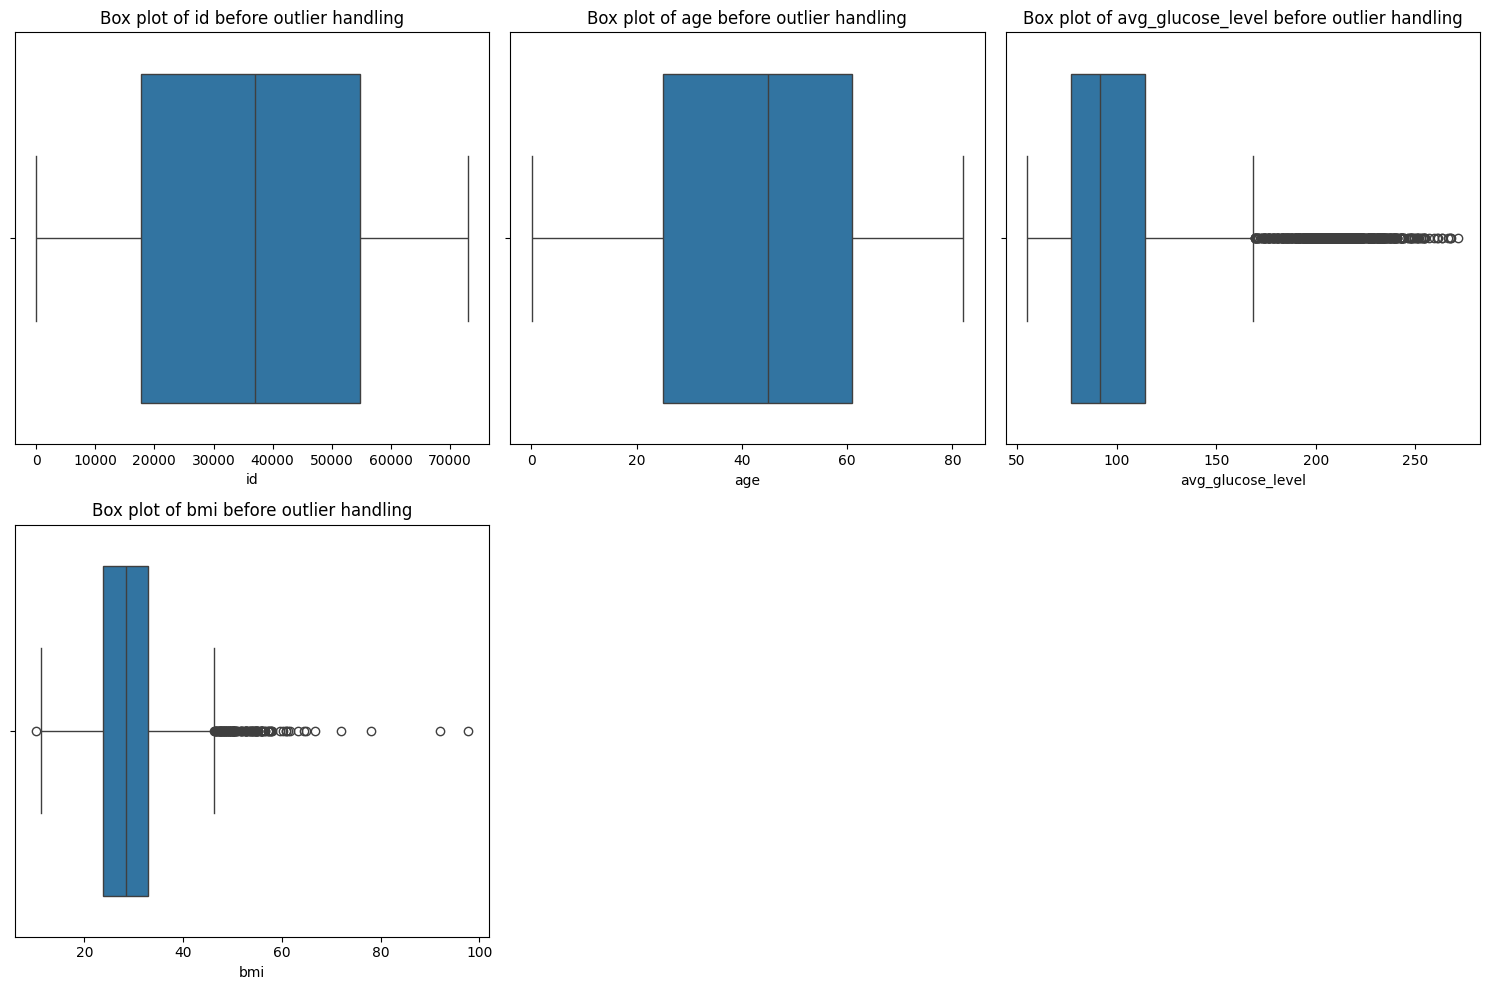

In [ ]:
# Identify numerical columns (excluding the binary columns created by one-hot encoding)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remove binary columns from the list of numerical columns
# We can identify binary columns as those resulting from one-hot encoding and potentially the original binary columns like 'hypertension', 'heart_disease', and 'stroke'.
# For simplicity, we will exclude columns that have only two unique values (0 and 1), assuming these are the binary/encoded columns.
binary_cols = [col for col in numerical_cols if df[col].nunique() <= 2]
outlier_check_cols = [col for col in numerical_cols if col not in binary_cols]

print("Numerical columns for outlier detection:")
print(outlier_check_cols)

# Visualize the distributions of relevant numerical features before outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_check_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} before outlier handling')
plt.tight_layout()
plt.show()

**Reasoning**:
Implement the IQR method to detect and handle outliers in the identified numerical columns and then visualize the distributions after outlier handling.




--- Handling outliers for column: id ---
Q1: 17741.25, Q3: 54682.0, IQR: 36940.75
Lower bound: -37669.875, Upper bound: 110093.125
Number of outliers detected: 0
Outliers in 'id' have been capped at the bounds.

--- Handling outliers for column: age ---
Q1: 25.0, Q3: 61.0, IQR: 36.0
Lower bound: -29.0, Upper bound: 115.0
Number of outliers detected: 0
Outliers in 'age' have been capped at the bounds.

--- Handling outliers for column: avg_glucose_level ---
Q1: 77.245, Q3: 114.09, IQR: 36.845
Lower bound: 21.977500000000006, Upper bound: 169.35750000000002
Number of outliers detected: 627
Outliers in 'avg_glucose_level' have been capped at the bounds.

--- Handling outliers for column: bmi ---
Q1: 23.8, Q3: 32.8, IQR: 8.999999999999996
Lower bound: 10.300000000000006, Upper bound: 46.29999999999999
Number of outliers detected: 126
Outliers in 'bmi' have been capped at the bounds.


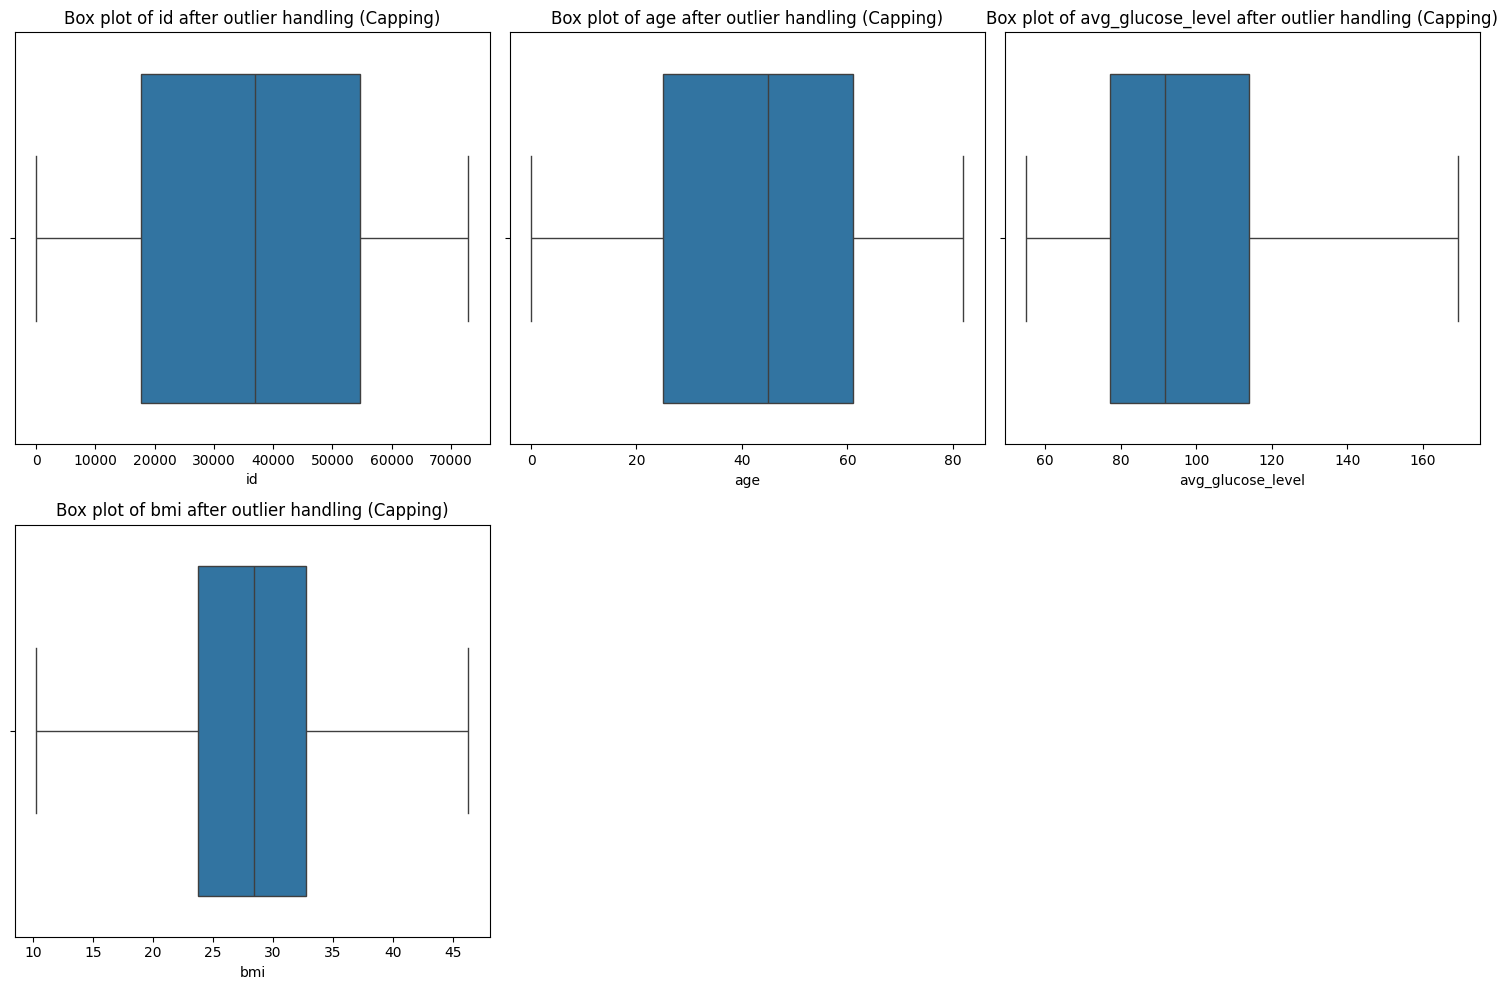

In [ ]:
# Implement outlier handling using the IQR method
df_cleaned = df.copy() # Create a copy to compare before and after

for col in outlier_check_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\n--- Handling outliers for column: {col} ---")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

    # Identify outliers
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"Number of outliers detected: {len(outliers)}")

    # Cap the values outside the bounds
    df_cleaned[col] = np.where(
        df_cleaned[col] < lower_bound,
        lower_bound,
        np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    )
    print(f"Outliers in '{col}' have been capped at the bounds.")


# Visualize the distributions of relevant numerical features after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_check_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box plot of {col} after outlier handling (Capping)')
plt.tight_layout()
plt.show()

df = df_cleaned # Update the original dataframe reference to the cleaned dataframe